# Dynamical Quantum Phase Transitions
Using qutip backend

In [19]:
import qse
import qutip as qp
import numpy as np
import matplotlib.pyplot as plt

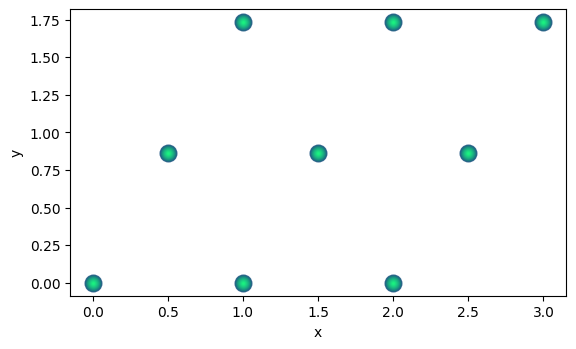

In [75]:
# qbits = qse.lattices.ring(1., 8)
qbits = qse.lattices.triangular(1., 3, 3)
qbits.draw()

In [76]:
hamiltonian = 0.

for i in range(qbits.nqbits):
    op = [qp.qeye(2)] * qbits.nqbits
    op[i] = qp.sigmax()
    hamiltonian += qp.tensor(op)


for i in range(qbits.nqbits-1):
    for j in range(i+1, qbits.nqbits):
        if qbits.get_distance(i, j) < 1.1:
            print(i, j)
            op = [qp.qeye(2)] * qbits.nqbits
            op[i] = qp.sigmaz()
            op[j] = qp.sigmaz()
            hamiltonian += qp.tensor(op)
hamiltonian

0 1
0 3
1 2
1 3
1 4
2 4
2 5
3 4
3 6
4 5
4 6
4 7
5 7
5 8
6 7
7 8


Quantum object: dims=[[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape=(512, 512), type='oper', dtype=CSR, isherm=True
Qobj data =
[[16.  1.  1. ...  0.  0.  0.]
 [ 1. 12.  0. ...  0.  0.  0.]
 [ 1.  0.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  8.  0.  1.]
 [ 0.  0.  0. ...  0. 12.  1.]
 [ 0.  0.  0. ...  1.  1. 16.]]

In [77]:
initial_state = qp.tensor([qp.fock(2)]*qbits.nqbits)

In [78]:
initial_state.basis_expansion()

'(1+0j) |000000000>'

In [79]:
times = np.linspace(0, 2*np.pi, 200)

evolutions = qp.sesolve(hamiltonian, initial_state, times)

In [80]:
loschmidt_amplitudes = np.array([initial_state.overlap(psi_evo) for psi_evo in evolutions.states])
loschmidt_echos = (np.conj(loschmidt_amplitudes) * loschmidt_amplitudes).real
#loschmidt_echos

In [81]:
rate_func = - np.log(loschmidt_echos) / qbits.nqbits

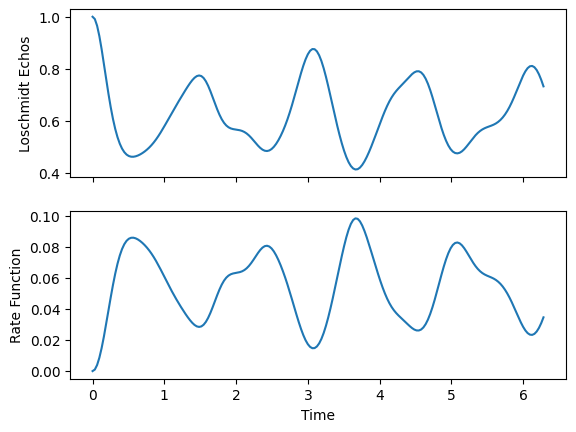

In [82]:
fig, axs = plt.subplots(nrows=2, sharex="col")

axs[0].plot(times, loschmidt_echos)
axs[0].set_ylabel("Loschmidt Echos")

axs[1].plot(times, rate_func)
axs[1].set_ylabel("Rate Function")
axs[1].set_xlabel("Time")

plt.show()